In [1]:
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from dataset import TreeStimuli, Neuron, Ensemble, LinearNeuron, InteractionNeuron,LogisticNeuron, UnivariateGaussianNeuron, MultivariateGaussianNeuron
from copy import deepcopy
from functools import partial
import random

# Synthetic dataset generation

## Stimuli space
First we generate a set of tree stimuli of varying leafiness and branchiness. 
Here we didn't specify the feature vector of leafiness and branchiness, and it will by default 
create 40 stimuli from factorial combinations of 20 levels of leafiness and 2 levels of branchiness


In [2]:
Trees = TreeStimuli()
Trees.stimuli.shape

(40, 2)

# Neuron Ensembles

In [6]:
noise_mu = 0.01
noise_sig = 0.01

In [7]:

## Ensemble 1:  3 pure selective - logistic
classes = [LinearNeuron]*3
params = [{"w":np.array([[1],[0]]), "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"w":np.array([[1],[0]]), "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"w":np.array([[0],[1]]), "noise_mu":noise_mu, "noise_sig":noise_sig}]
PureSelectiveLogisticEnsemble = Ensemble(classes,params)

## Ensemble 2:  3 pure selective - logistic
classes = [UnivariateGaussianNeuron]*3
params = [{"w":np.array([[1],[0]]), 'mu':0.2, 'sig':0.4, "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"w":np.array([[1],[0]]), 'mu':0.9, 'sig':0.3, "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"w":np.array([[0],[1]]), 'mu':0.6, 'sig':0.5, "noise_mu":noise_mu, "noise_sig":noise_sig}]
PureSelectiveGaussianEnsemble = Ensemble(classes,params)

## Ensemble 3:  Mixed selective, Linear - logistic
classes = [LinearNeuron]*3
params = [{"w":np.array([[0.5],[0.5]]), "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"w":np.array([[0.2],[0.8]]), "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"w":np.array([[0.7],[0.3]]), "noise_mu":noise_mu, "noise_sig":noise_sig}]
LinearMixSelectiveLogisticEnsemble = Ensemble(classes,params)

## Ensemble 3:  3 mixed selective, Non linear - multivariate gaussian
classes = [MultivariateGaussianNeuron]*3
params = [{"mus":[0.23,0.73],
           "cov":0.33, "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"mus":[1.04,0.17],
           "cov":0.33, "noise_mu":noise_mu, "noise_sig":noise_sig},
          {"mus":[0.5,0.2],
           "cov":0.33, "noise_mu":noise_mu, "noise_sig":noise_sig}]
NonlinearMixSelectiveMGaussianEnsemble = Ensemble(classes,params)

ThreeNeuronSpaces = {
    "Stimuli Space":Trees.stimuli,
    "Pure Selective - Linear":PureSelectiveLogisticEnsemble.fire(Trees.stimuli),
    "Pure Selective - Non linear":PureSelectiveGaussianEnsemble.fire(Trees.stimuli),
    "Mixed Selective - Linear":LinearMixSelectiveLogisticEnsemble.fire(Trees.stimuli),
    "Mixed Selective - Non Linear": NonlinearMixSelectiveMGaussianEnsemble.fire(Trees.stimuli)
}


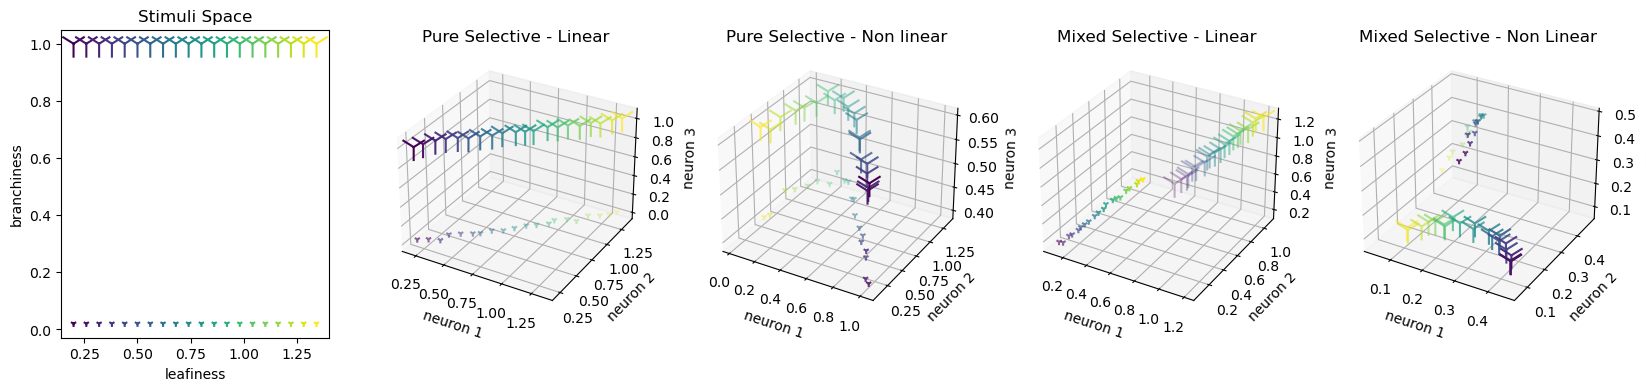

In [14]:
# visualize neural representation - firing response

# compute PCA
from sklearn.decomposition import PCA
pca_space = {}
for js,(s_name,s_mat) in enumerate(ThreeNeuronSpaces.items()):
    pca_space[s_name] = PCA(n_components=2).fit_transform(s_mat)

# Plot firing rates and PCA transformed firing rates
fig = plt.figure(figsize=(4*len(ThreeNeuronSpaces),4))
for js,(s_name,s_mat) in enumerate(ThreeNeuronSpaces.items()):

    if "Stimuli" in s_name:
        ax = fig.add_subplot(1, len(ThreeNeuronSpaces), js+1)
        ax.scatter(s_mat[:,0], s_mat[:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
        ax.set_xlabel('leafiness')
        ax.set_ylabel('branchiness')
       
    elif "stimuli" not in s_name:
        ax = fig.add_subplot(1, len(ThreeNeuronSpaces), js+1, projection='3d')
        ax.scatter(s_mat[:,0], s_mat[:,1], s_mat[:,2], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
        ax.set_xlabel('neuron 1')
        ax.set_ylabel('neuron 2')
        ax.set_zlabel('neuron 3')
    ax.set_title(s_name)

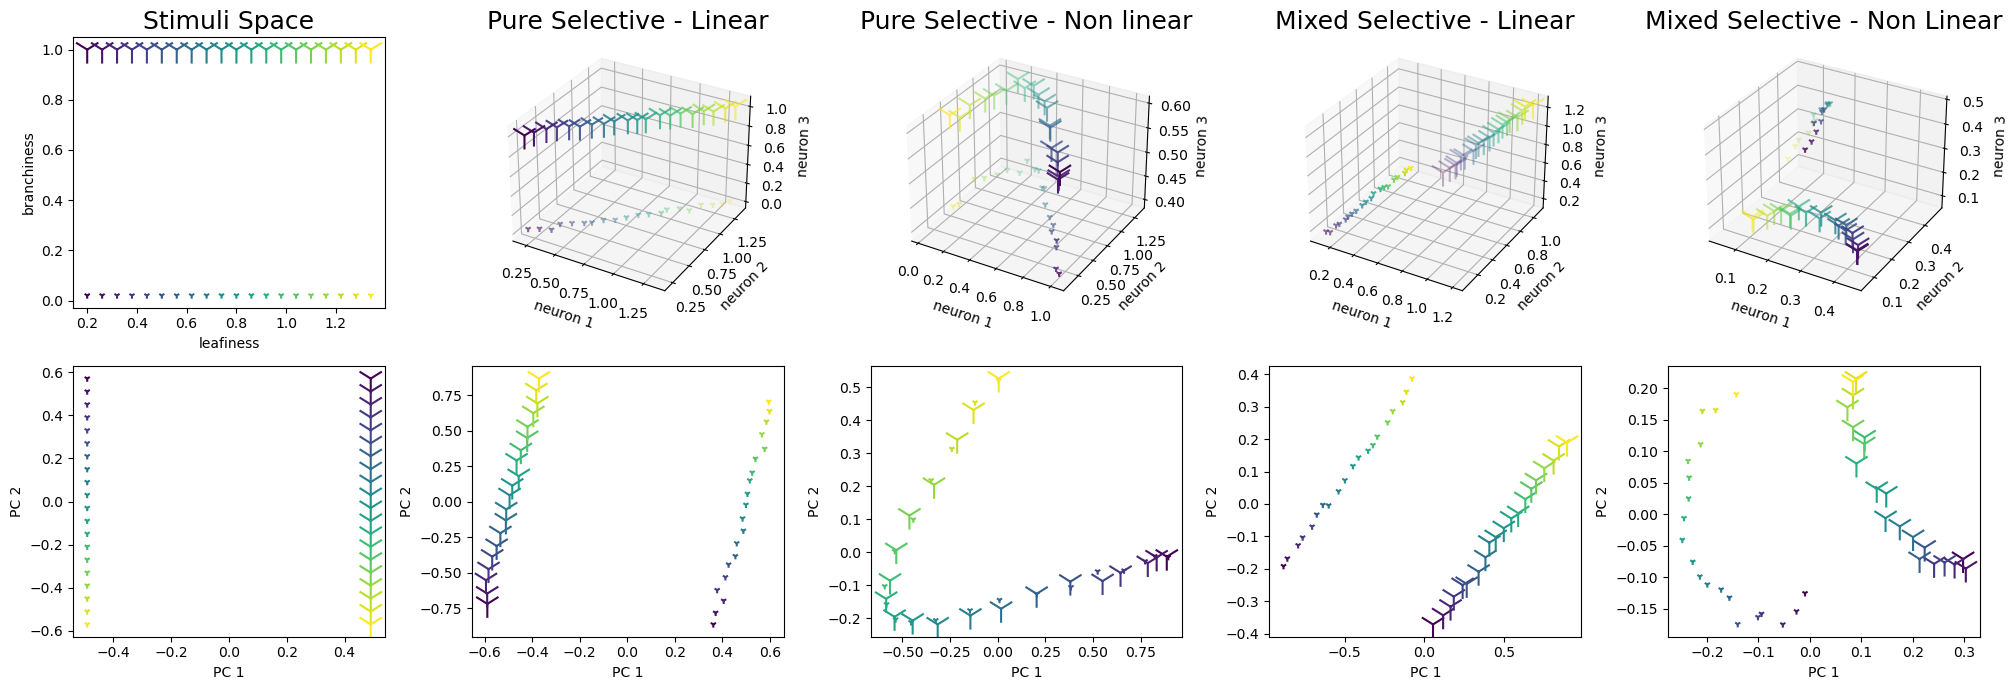

In [15]:
# visualize neural representation - firing response

# compute PCA
from sklearn.decomposition import PCA
pca_space = {}
for js,(s_name,s_mat) in enumerate(ThreeNeuronSpaces.items()):
    pca_space[s_name] = PCA(n_components=2).fit_transform(s_mat)

# Plot firing rates and PCA transformed firing rates
fig = plt.figure(figsize=(4*len(ThreeNeuronSpaces),7))
for js,(s_name,s_mat) in enumerate(ThreeNeuronSpaces.items()):

    if "Stimuli" in s_name:
        ax = fig.add_subplot(2, len(ThreeNeuronSpaces), js+1)
        ax.scatter(s_mat[:,0], s_mat[:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
        ax.set_xlabel('leafiness')
        ax.set_ylabel('branchiness')
    elif "stimuli" not in s_name:
        ax = fig.add_subplot(2, len(ThreeNeuronSpaces), js+1, projection='3d')
        ax.scatter(s_mat[:,0], s_mat[:,1], s_mat[:,2], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
        ax.set_xlabel('neuron 1')
        ax.set_ylabel('neuron 2')
        ax.set_zlabel('neuron 3')
    
    ax.set_title(s_name, fontsize=18)
    ax2 = fig.add_subplot(2, len(ThreeNeuronSpaces), len(ThreeNeuronSpaces) + js+1)
    ax2.scatter(x=pca_space[s_name][:,0],y=pca_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")
    
fig.tight_layout()

/Users/miahannah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/miahannah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/miahannah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/miahannah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/miahannah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embeddin

Stimuli Space (40, 2)
Pure Selective - Linear (40, 3)
Pure Selective - Non linear (40, 3)
Mixed Selective - Linear (40, 3)
Mixed Selective - Non Linear (40, 3)


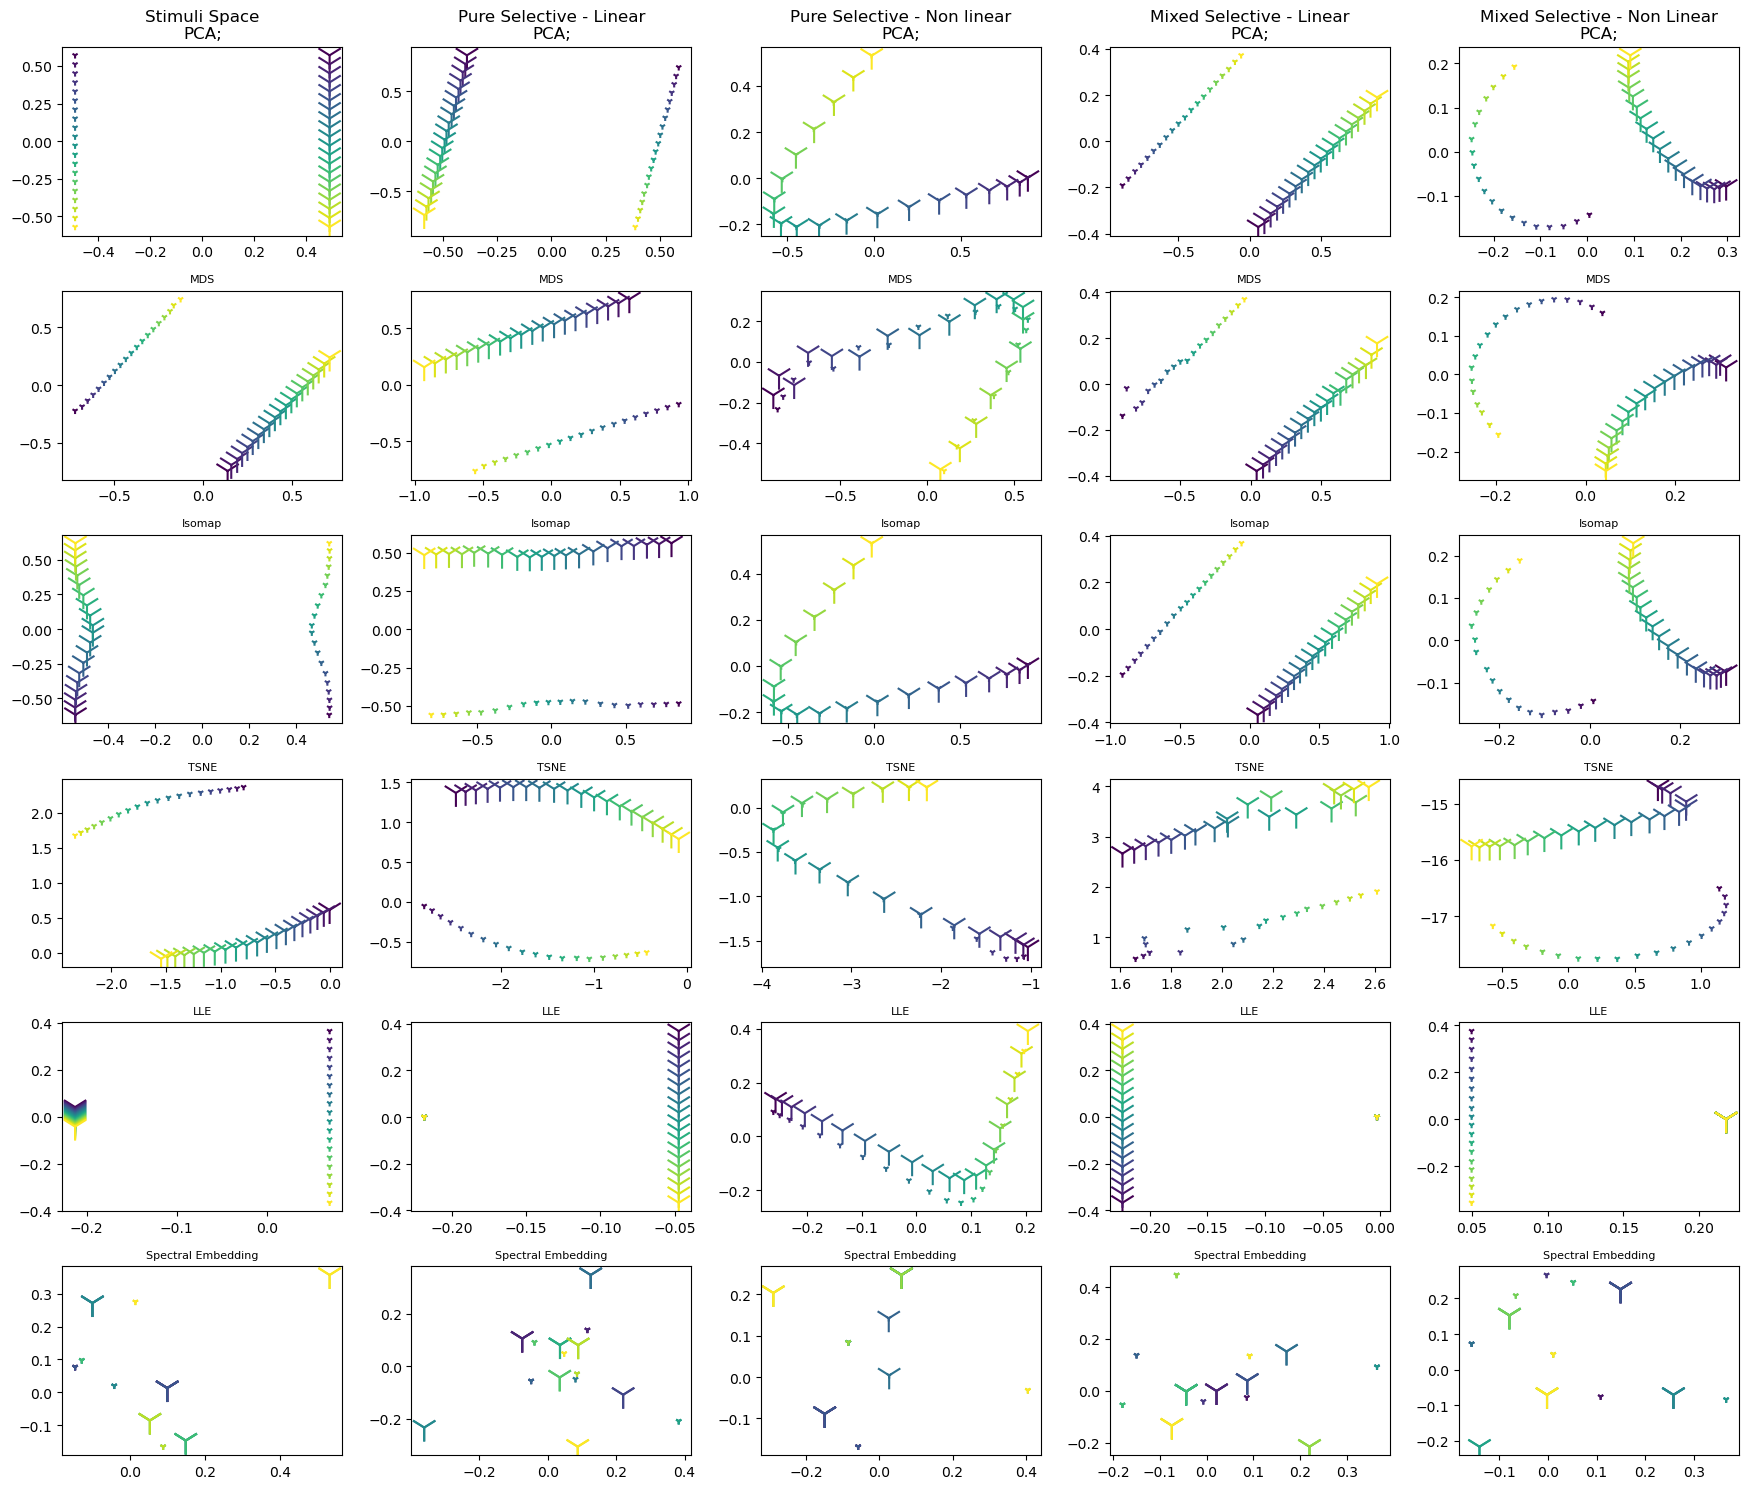

In [10]:
# visualize neural representation - firing response

# compute Dim reduction
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

NeuronSpaces =  ThreeNeuronSpaces

# calculate...
pca_space, mds_space, isomap_space, tsne_space, LLE_space, spec_space = {}, {}, {}, {}, {}, {}
for js,(s_name,s_mat) in enumerate(NeuronSpaces.items()):
    pca_space[s_name] = PCA(n_components=2).fit_transform(s_mat)
    mds_space[s_name] = MDS(n_components=2).fit_transform(s_mat)
    isomap_space[s_name] = Isomap(n_components=2, n_neighbors=30).fit_transform(s_mat)
    tsne_space[s_name] = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(s_mat)
    LLE_space[s_name] = LocallyLinearEmbedding(n_components=2).fit_transform(s_mat)
    spec_space[s_name] = SpectralEmbedding(n_components=2, n_neighbors=2).fit_transform(s_mat)

# Plot firing rates and PCA transformed firing rates
cols = len(NeuronSpaces)
rows = 6
fig = plt.figure(figsize=(3.5*cols,15))
for jss,(s_name,s_mat) in enumerate(NeuronSpaces.items()):
    print(s_name, s_mat.shape)
    js=jss+1
    ax1 = fig.add_subplot(6, cols, js)
    ax1.scatter(x=pca_space[s_name][:,0],y=pca_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax1.set_title(f'{s_name}\nPCA;')

    ax2 = fig.add_subplot(6, cols, cols + js)
    ax2.scatter(x=mds_space[s_name][:,0],y=mds_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax2.set_title(f'MDS', fontsize=8)

    ax3 = fig.add_subplot(6, cols, 2*cols + js)
    ax3.scatter(x=isomap_space[s_name][:,0],y=isomap_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax3.set_title(f'Isomap', fontsize=8)

    ax3 = fig.add_subplot(6, cols, 3*cols + js)
    ax3.scatter(x=tsne_space[s_name][:,0],y=tsne_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax3.set_title(f'TSNE', fontsize=8)

    ax4 = fig.add_subplot(6, cols, 4*cols + js)
    ax4.scatter(x=LLE_space[s_name][:,0],y=LLE_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax4.set_title(f'LLE', fontsize=8)

    ax5 = fig.add_subplot(6, cols, 5*cols + js)
    ax5.scatter(x=spec_space[s_name][:,0],y=spec_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax5.set_title(f'Spectral Embedding', fontsize=8)

fig.tight_layout()

In [50]:

# variance explained by the first PC and also effective dimensionality
for js,(s_name,s_mat) in enumerate(ThreeNeuronSpaces.items()):
    model = PCA(n_components=2)
    model.fit_transform(s_mat)
    pc1 = model.explained_variance_ratio_
    print(f'{s_name}:\nDeff = {round(compute_dimensionality(s_mat),2)}; PC1 variance = {round(pc1[0],2)}\n')
    

NameError: name 'compute_dimensionality' is not defined

In [ ]:
def compute_effective_dimensionality(eigenspectrum: np.ndarray) -> float:
    """ Args: Array of eigenvalue
        Returns: Effective dimension"""
    return (np.sum(eigenspectrum) ** 2) / (eigenspectrum**2).sum()


def compute_dimensionality(firing_matrix):
    """ Computes effective_dimensionality for a matrix of firing rates
    Args: NxM firing rate matrix for a set of N neurons and M inputs
    Returns: effective dimensionality 
    """
    pca = PCA()
    PCs = pca.fit_transform(firing_matrix)
    eigenvalues = pca.explained_variance_
    dim = compute_effective_dimensionality(eigenvalues)
    
    return dim


## Generate data set : Many neurons

In [ ]:
## try with N neurons
N = 100


## Ensemble 1:  3 pure selective - logistic
classes = [LogisticNeuron]*N
params = []
for n in range(N):
    params.append({"w":np.array(random.choice([[[0],[1]],[[1],[0]]])),
           "k": random.uniform(1,5),
           "x0":random.uniform(0.1,0.9)})
PS = Ensemble(classes,params)

## Ensemble 2:  Mixed selective, Linear - logistic
classes = [LogisticNeuron]*N
params = []
for n in range(N):
    params.append({"w":np.array([[random.uniform(0,1)], [random.uniform(0,1)]]),
           "k":random.uniform(1,5),
           "x0":random.uniform(0.1,0.9)})
LM = Ensemble(classes,params)

## Ensemble 3:  3 mixed selective, Linear - multivariate gaussian
classes = [MultivariateGaussianNeuron]*N
params = []
for n in range(N):
    params.append({"mus": np.array([random.uniform(0,1),random.uniform(0,1)]),
           "cov":random.uniform(0,1)})
NLM = Ensemble(classes,params)

FiveNeuronSpaces = {
    "stimuli space":Trees.stimuli,
    "Pure Selective":PS.fire(Trees.stimuli),
    "Linear Mixed Selective":LM.fire(Trees.stimuli),
    "Nonlinear Mixed Selective": NLM.fire(Trees.stimuli)
}


stimuli space (40, 2)
Pure Selective (40, 100)
Linear Mixed Selective (40, 100)
Nonlinear Mixed Selective (40, 100)


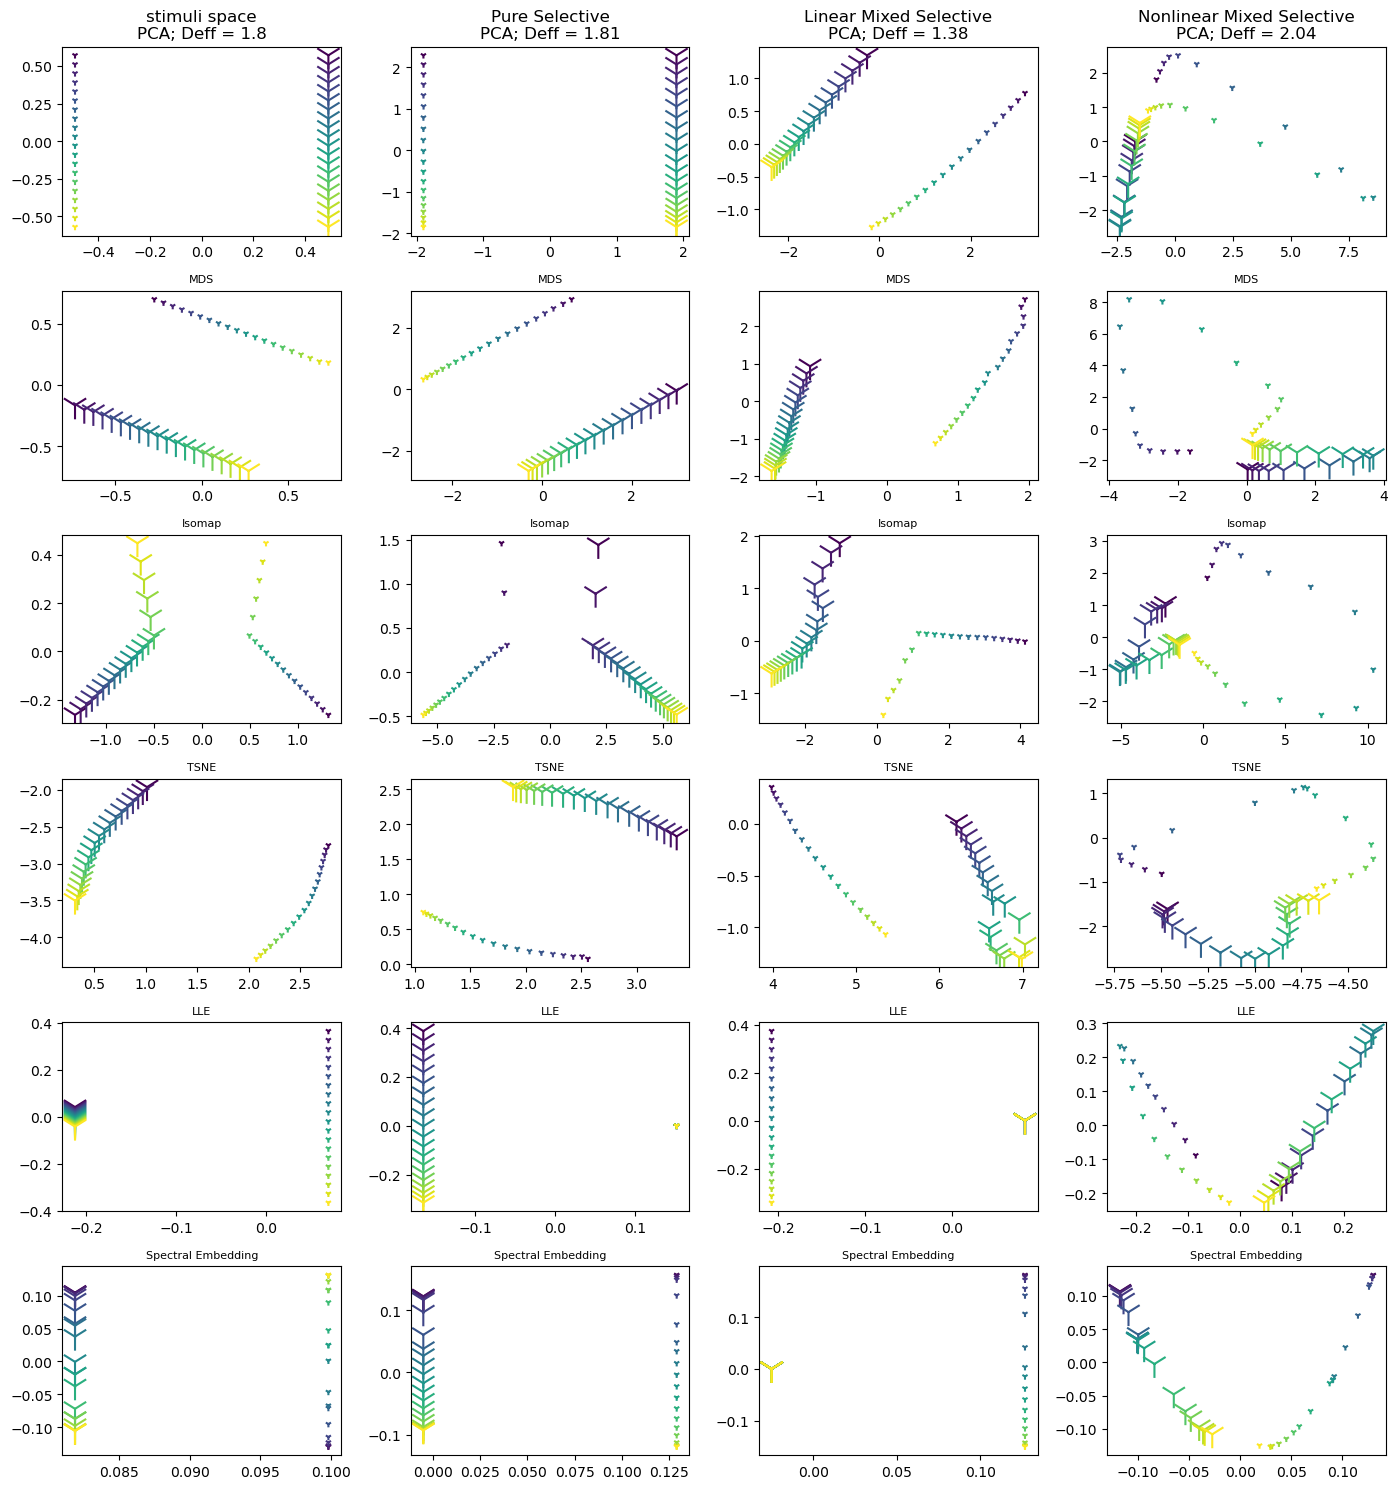

In [ ]:
# visualize neural representation - firing response

# compute Dim reduction
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

# calculate...
pca_space, mds_space, isomap_space, tsne_space, LLE_space, spec_space = {}, {}, {}, {}, {}, {}
for js,(s_name,s_mat) in enumerate(FiveNeuronSpaces.items()):
    pca_space[s_name] = PCA(n_components=2).fit_transform(s_mat)
    mds_space[s_name] = MDS(n_components=2).fit_transform(s_mat)
    isomap_space[s_name] = Isomap(n_components=2, n_neighbors=15).fit_transform(s_mat)
    tsne_space[s_name] = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(s_mat)
    LLE_space[s_name] = LocallyLinearEmbedding(n_components=2).fit_transform(s_mat)
    spec_space[s_name] = SpectralEmbedding(n_components=2).fit_transform(s_mat)

# Plot firing rates and PCA transformed firing rates
fig = plt.figure(figsize=(3.5*len(FiveNeuronSpaces),15))
for jss,(s_name,s_mat) in enumerate(FiveNeuronSpaces.items()):
    print(s_name, s_mat.shape)
    js=jss+1
    ax1 = fig.add_subplot(6, len(FiveNeuronSpaces), js)
    ax1.scatter(x=pca_space[s_name][:,0],y=pca_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax1.set_title(f'{s_name}\nPCA; Deff = {round(compute_dimensionality(s_mat),2)}')

    ax2 = fig.add_subplot(6, len(FiveNeuronSpaces), len(FiveNeuronSpaces) + js)
    ax2.scatter(x=mds_space[s_name][:,0],y=mds_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax2.set_title(f'MDS', fontsize=8)

    ax3 = fig.add_subplot(6, len(FiveNeuronSpaces), 2*len(FiveNeuronSpaces) + js)
    ax3.scatter(x=isomap_space[s_name][:,0],y=isomap_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax3.set_title(f'Isomap', fontsize=8)

    ax3 = fig.add_subplot(6, len(FiveNeuronSpaces), 3*len(FiveNeuronSpaces) + js)
    ax3.scatter(x=tsne_space[s_name][:,0],y=tsne_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax3.set_title(f'TSNE', fontsize=8)

    ax4 = fig.add_subplot(6, len(FiveNeuronSpaces), 4*len(FiveNeuronSpaces) + js)
    ax4.scatter(x=LLE_space[s_name][:,0],y=LLE_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax4.set_title(f'LLE', fontsize=8)

    ax5 = fig.add_subplot(6, len(FiveNeuronSpaces), 5*len(FiveNeuronSpaces) + js)
    ax5.scatter(x=spec_space[s_name][:,0],y=spec_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax5.set_title(f'Spectral Embedding', fontsize=8)

fig.tight_layout()

# Dimensionality estimation methods

In [118]:
import skdim

In [121]:
for js,(s_name,s_mat) in enumerate(FiveNeuronSpaces.items()):
    
    model = PCA(n_components=2)
    model.fit_transform(s_mat)
    dimPC1 =model.explained_variance_ratio_[0]
    dimEff = compute_dimensionality(s_mat)
    dimPCA_default = skdim.id.lPCA().fit(s_mat).dimension_
    dimPCA_PR = round(skdim.id.lPCA(ver='participation_ratio').fit(s_mat).dimension_,2)
    dimFisherS = round(skdim.id.FisherS().fit(s_mat).dimension_,2)
    dimCorrInt = round(skdim.id.CorrInt().fit(s_mat).dimension_,2)
    dimKNN = round(skdim.id.KNN().fit(s_mat).dimension_,2)
    dimMLE= round(skdim.id.MLE().fit(s_mat).dimension_,2)
    dimMiNDML = round(skdim.id.MiND_ML().fit(s_mat).dimension_,2)
    
    
    print(f'{s_name}:\nLINEAR:: PC1 variance = {round(dimPC1,2)}, Deff = {round(dimEff,2)}; Participation ratio: {dimPCA_PR}\nNONLINEAR:: Fisher S: {dimFisherS}; CorrInt: {dimCorrInt},KNN: {dimKNN}; MLE: {dimMLE}; MiND_ML: {dimMiNDML}\n')

stimuli space:
LINEAR:: PC1 variance = 0.67, Deff = 1.8; Participation ratio: 1.8
NONLINEAR:: Fisher S: 1.93; CorrInt: 0.72,KNN: 1; MLE: 0.89; MiND_ML: 1.19

Pure Selective:
LINEAR:: PC1 variance = 0.67, Deff = 1.81; Participation ratio: 1.81
NONLINEAR:: Fisher S: 1.9; CorrInt: 0.73,KNN: 1; MLE: 0.88; MiND_ML: 1.17

Linear Mixed Selective:
LINEAR:: PC1 variance = 0.84, Deff = 1.38; Participation ratio: 1.38
NONLINEAR:: Fisher S: 1.88; CorrInt: 0.99,KNN: 2; MLE: 1.04; MiND_ML: 1.26

Nonlinear Mixed Selective:
LINEAR:: PC1 variance = 0.67, Deff = 2.04; Participation ratio: 2.04
NONLINEAR:: Fisher S: 2.04; CorrInt: 1.58,KNN: 100; MLE: 1.83; MiND_ML: 2.0



## TODO:

# do dimensionality estimate methods for...
Shattering dimensionality